How to extract features out of a pre-trained model

We'll be using the VGG16 model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array

In [3]:
import numpy as np

In [4]:
model=VGG16()
model.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

Again - large model with lots of conv blocks and the last the top layers or flattened layers.

First we'll try to get a subset of this model without these flattened layers and only work with the model which only includes the conv blocks - using include_top=False

In [5]:
model1=VGG16(include_top=False)
model1.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

Let's read in the Pizza image and perform the necessary preproc that we've done before

In [6]:
img_path="/content/drive/MyDrive/CNN/pizza.jpg"
img=load_img(img_path,target_size=(224,224))
img_arr=img_to_array(img)
img_arr=np.expand_dims(img_arr,axis=0)
img_pre_processed=preprocess_input(img_arr)

Now we'll pass the processed image through the subset of the vgg16 model that doesn't contain the top layer/flattened layer

let's obtain the predictions only using the convolutional blocks

In [7]:
pred=model1.predict(img_pre_processed)

In [8]:
pred.shape

(1, 7, 7, 512)

### The output is 512 arrays of dim 7 by 7, lets visualize one of these arrays to see if we can make any sense out of it

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Lets try to plot the first array out of the 512 arrays

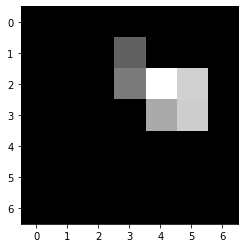

In [10]:
plt.imshow(pred[:,:,:,0].reshape(7,7),cmap='gray')

Lets try to plot the 33rd array out of the 512 arrays

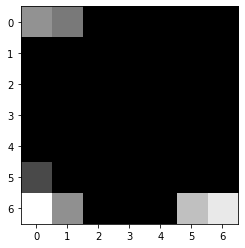

In [11]:
plt.imshow(pred[:,:,:,34].reshape(7,7),cmap='gray')

We can think of the intermediate outputs as features. 

The features extracted by the top layers of the model are very abstract and are very difficult to interpret, so we can also extract features from lower layers and visualize

Now lets take a step back and subset the model further to work with the first conv block and then pass the image only through the first conv block

In [12]:
model1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

We can subset using the Model object in the keras module using get_layer by specifying the specific block's special name

In [13]:
from keras.models import Model
mod=Model(inputs=model1.input,
         outputs=model1.get_layer('block1_conv1').output)

In [14]:
mod.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [15]:
pred1=mod.predict(img_pre_processed)

In [16]:
pred1.shape

(1, 224, 224, 64)

64 arrays, each 224px224p

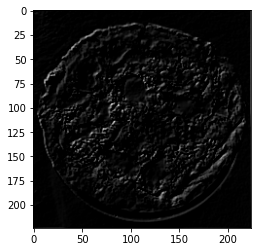

In [17]:
plt.imshow(pred1[:,:,:,0].reshape(224,224),cmap='gray')

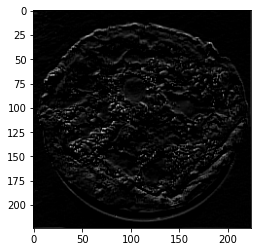

In [18]:
plt.imshow(pred1[:,:,:,10].reshape(224,224),cmap='gray')

One can think of these convolutional blocks similar to feature extractors.

In the 1st conv block, the convolution layer appears to be trying to identify the contours of an image.

It was not easy to interpret what the topmost conv layers were doing but the argument here is the conv layers can be thought of as feature extractors and these features extracted can be used as inputs to some other model